<a href="https://colab.research.google.com/github/Abohassan19/MNIST-Handwritten-Digits-Recognition-using-SVM-in-Python/blob/master/Handwritten_Digits_Recognition_using_SVMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Mounting Google Drive to load data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Loading Kaggle MNIST data from drive

train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML Project/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML Project/test.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Shuffeling training data
train_shuffled = shuffle(train.values, random_state=0)

# Extracting features as X and labels as y
X_train = train.drop(labels = ["label"],axis = 1) 
y_train = train["label"]

# Loading test data (no labels are provieded)
X_test = test.values

print(f'X_train = {X_train.shape}, y = {y_train.shape}, X_test = {X_test.shape}')

X_train = (42000, 784), y = (42000,), X_test = (28000, 784)


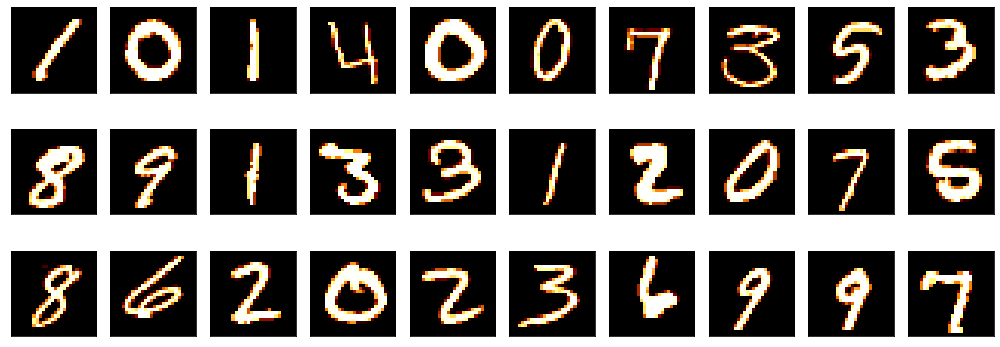

In [0]:
# Plotting some digits

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = X_train.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

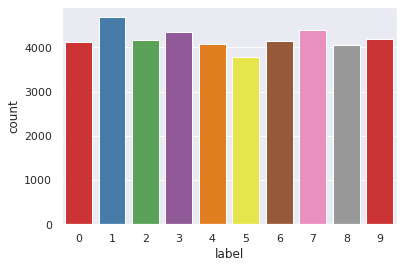

In [0]:
# Exploring the class distribution (almost equally distributed)

sns.set(style="darkgrid")
counts = sns.countplot(x="label", data=train, palette="Set1")

In [0]:
# Normalizing data .. Normilization was found better in this dataset than Standardization
# Normilization between (0, 1) was tested vs (-1, 1) and (-1, 1) showed better results

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [0]:
# # Finding best gamma and C for RBF kernel (not recommended to re-run as it consumes too much time)
# # Result: gamma =  0.00728932024638, C = 2.82842712475

# %%time

# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import GridSearchCV

# # C_range = np.logspace(-2, 2, 10)
# # gamma_range = np.logspace(-2, 2, 10)
# # param_grid = dict(gamma=gamma_range, C=C_range)

# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#           'gamma': [0.0001, 0.001, 0.01, 0.1],
#           'kernel':['linear','rbf'] }
# cv = StratifiedShuffleSplit(test_size=0.2, random_state=42)
# grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
# grid.fit(normalized_X_train, y_train)

# print("The best parameters are %s with a score of %0.2f"
#       % (grid.best_params_, grid.best_score_))

![alt text](https://scikit-learn.org/dev/_images/sphx_glr_plot_rbf_parameters_002.png)


```
The best parameters are {'C': 2.82842712475, 'gamma': 0.00728932024638} with a score of 0.97
```



In [0]:
# Dimensionality Reduction with PCA (Principal Component Analysis)

pca = PCA(n_components=0.90)
pca_X_train = pca.fit_transform(normalized_X_train)
pca_X_test = pca.transform(normalized_X_test)
print(f'{pca.explained_variance_} \n Number of PCA Vectors = {len(pca.explained_variance_)}' )

[20.59396208 15.12557166 12.98279984 11.36340812 10.33879335  9.0902447
  6.92254521  6.10937067  5.84489188  4.96182926  4.43468119  4.34949919
  3.596528    3.57589708  3.34002144  3.13324312  2.78775045  2.70967483
  2.50951847  2.43511597  2.2649309   2.14453989  2.03829065  1.92832524
  1.8750809   1.77183673  1.71499037  1.64221672  1.56454152  1.4505261
  1.38994301  1.34941899  1.26612239  1.24403987  1.1921198   1.14275656
  1.07569672  1.02982121  1.00460867  0.98554414  0.95683168  0.94000972
  0.88353615  0.83970416  0.81231911  0.79199201  0.76261607  0.7362296
  0.7108082   0.67753809  0.66640323  0.65304933  0.62044092  0.6052997
  0.59308595  0.56955085  0.56155099  0.54141379  0.53618028  0.52003515
  0.50638437  0.50432147  0.48077185  0.46794302  0.45192074  0.43544311
  0.42850951  0.41398791  0.40904879  0.39816259  0.39449945  0.38376618
  0.37367151  0.3645902   0.35091959  0.34498082  0.33926002  0.32631278
  0.31021037  0.30075989  0.29806156  0.29622364  0.293

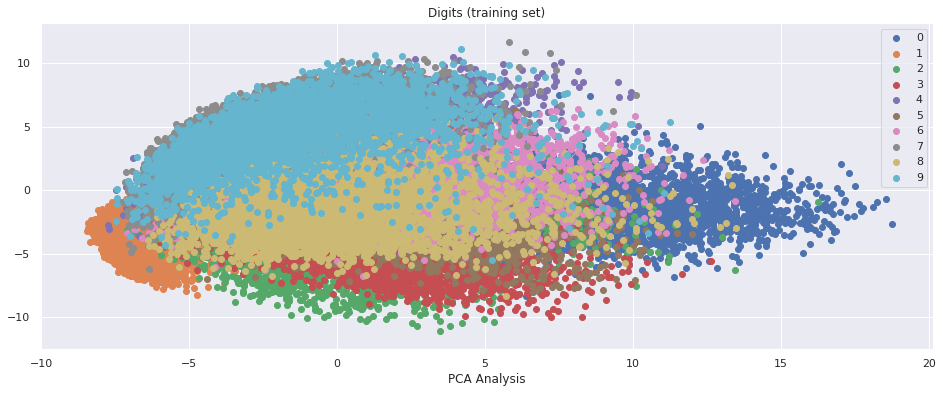

In [0]:
# Plotting PCA output
f, ax = plt.subplots(1, 1)
for i in range(10):
  ax.scatter(pca_X_train[y_train == i, 0], pca_X_train[y_train == i, 1], label=i)
ax.set_xlabel("PCA Analysis")
ax.legend()
f.set_size_inches(16, 6)
ax.set_title("Digits (training set)")
plt.show()

In [0]:
# Trainging the SVC model with gamma and C found in previous step

classifier = svm.SVC(gamma=0.00728932024638, C=2.82842712475)
classifier.fit(pca_X_train, y_train)

# Calculating the training accuracy (to measure the bias)
train_accuracy = classifier.score(pca_X_train, y_train)
print (f"Training Accuracy: {train_accuracy*100:.3f}%")

# Getting predictions 
predictions = classifier.predict(pca_X_test)

Training Accuracy: 99.924%


In [0]:
# Saving predictions to a .csv file to be submitted on Kaggle for calculating 
# the testing accuracy (in terms of how many correct classifications)

ImageId = [i+1 for i in range(len(predictions))]
submission = pd.DataFrame({'ImageId':ImageId,'Label':(predictions)})
filename = 'Digit Recognizer - SVM.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)
submission.head()

Saved file: Digit Recognizer - SVM.csv


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


Kaggle Submission Result:

<a href="https://drive.google.com/uc?export=view&id=16n-tsBjTTB4ahl2S2G8cRV-kjgKjdlJ7"><img src="https://drive.google.com/uc?export=view&id=16n-tsBjTTB4ahl2S2G8cRV-kjgKjdlJ7" style="width: 500px; max-width: 100%; height: auto" title="Click for the larger version." /></a>
[Leaderboard Link](https://www.kaggle.com/c/digit-recognizer/leaderboard#score)

*   Test Accuracy Before PCA = 98.314%
*   Test Accuracy After PCA = 98.414%


